# 1. Crystal Ball

### a.
The integration over a normalized probability must equal unity.

The normalization factor \( N \) is determined by the following condition:

$$
N \cdot \left( \int_{-\beta}^\infty e^{-\frac{Z^2}{2}} \, dZ + \int_0^{-\beta} \left( \frac{m}{\beta} \right)^m e^{-\frac{\beta^2}{2}} \left( \frac{m}{\beta} - \beta - Z \right)^{-m} \, dZ \right)\cdot \frac{dX}{dZ} = 1
$$

---

### Evaluate the first integral

The first integral is:

$$
\int_{-\beta}^\infty e^{-\frac{Z^2}{2}} \, dZ
$$

The cumulative density function of the standard normal distribution is defined as:

$$
\Phi(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^x e^{-\frac{t^2}{2}} \, dt
$$

From this, the tail probability (i.e., the integral from \(x\) to \(\infty\)) is:

$$
\int_x^\infty e^{-\frac{Z^2}{2}} \, dZ = \sqrt{2\pi} \cdot (1 - \Phi(x))
$$

Therefore, the first integral can be written as:

$$
\int_{-\beta}^\infty e^{-\frac{Z^2}{2}} \, dZ = \sqrt{2\pi} \cdot (1 - \Phi(-\beta))
$$

Using the symmetry of gaussian distribution, it is then rewritten as,
$$ \sqrt{2\pi} \cdot (1 - \Phi(-\beta)) = \sqrt{2\pi} \Phi(\beta) $$


---

### Evaluate the second integral

The second integral is:

$$
\int_0^{-\beta} \left( \frac{m}{\beta} \right)^m e^{-\frac{\beta^2}{2}} \left( \frac{m}{\beta} - \beta - Z \right)^{-m} \, dZ
$$

#### Variable substitution:

Let:
$$
a = \frac{m}{\beta} - \beta - Z
$$

Then:
$$
\frac{dZ}{da} = -1
$$


When $ Z = -\beta $, $ a = \frac{m}{\beta} $.

When $ Z = 0 $, $ a = 0 $.

Substituting, the integral becomes:

$$
-\left( \frac{m}{\beta} \right)^m e^{-\frac{\beta^2}{2}} \int_0^{\frac{m}{\beta}} a^{-m} \, da
$$
.
After performing the integration for the second term:

$$
\int_0^{\frac{m}{\beta}} a^{-m} \, da
$$

The result simplifies to:

$$
\frac{a^{-(m-1)}}{-(m-1)} \Bigg|_0^{\frac{m}{\beta}}
$$

Evaluating this expression:

$$
-\frac{\left(\frac{m}{\beta}\right)^{-(m-1)}}{m-1} = \frac{m / \beta}{m - 1}
$$

Thus, the second term becomes:

$$
\frac{m / \beta}{m - 1} e^{-\beta^2 / 2}
$$


---

The total normalization condition is then:

$$
 N (\sqrt{2\pi} \Phi(\beta) + \frac{m / \beta}{m - 1} e^{-\beta^2 / 2})\sigma = 1
$$




### b.
f(x, y) = f*s(x, y) + (1-f)*n(x, y)
= f*g_s(x)*h_s(y) L (1-f)*g_b(x)*h_b(y)
g_s =  crystal ball function
h_s = lambda*exp(-lambda*y)
g_b = uniform random noise
h_b = 1/sigma/sqrt(2*pi)*exp(-1/2*(x-mu)/(sigma**2))
where X is in range of [0, 5] and Y is in range of [0, 10].




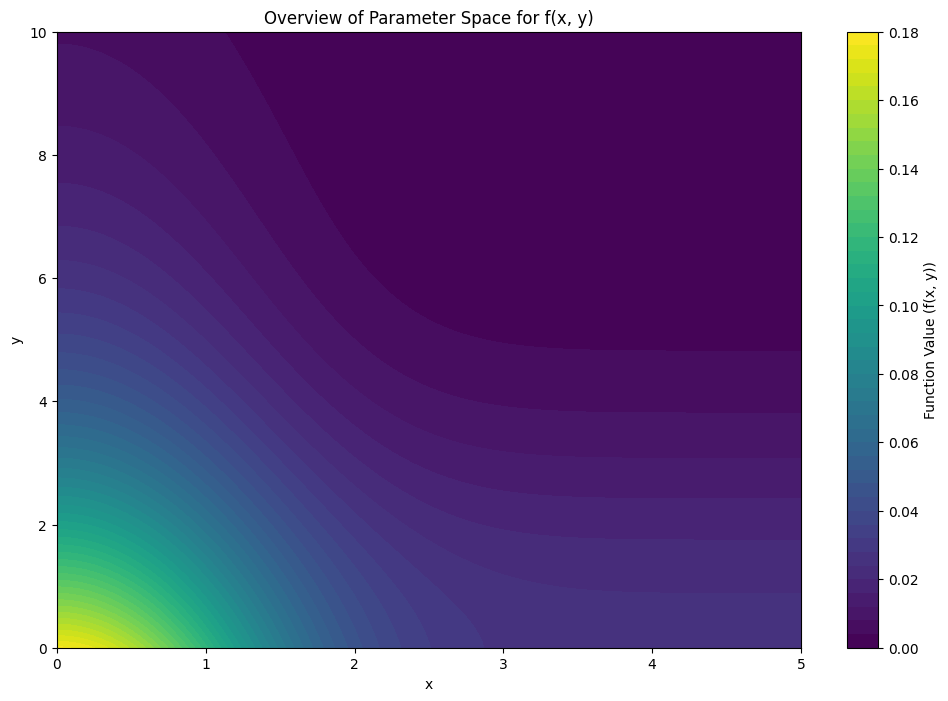

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import crystalball, uniform, norm, expon
from scipy.integrate import dblquad


class Function:
    """Base class to hold parameters and shared methods."""
    # Global parameter store
    global_params = {
        "beta": 1.0,
        "m": 1.4,
        "lambda_param": 0.3,
        "mub": 0,
        "sigmab": 2.5,
        "mu": 3,
        "sigma": 0.3,
        "f": 0.6,
    }

    def __init__(self):
        # Instance parameters initialized from global parameters
        for key, value in self.global_params.items():
            setattr(self, key, value)
        self.func = None  # Placeholder for specific function

    @classmethod
    def update_global_params(cls, **kwargs):
        """Update global parameters and propagate changes to all instances."""
        for key, value in kwargs.items():
            if key in cls.global_params:
                cls.global_params[key] = value
            else:
                raise AttributeError(f"Parameter {key} does not exist.")
        cls._propagate_updates()

    @classmethod
    def _propagate_updates(cls):
        """Optional method for subclasses to update their functions."""
        pass

    def __call__(self, *args, **kwargs):
        """Evaluate the function."""
        if self.func is None:
            raise NotImplementedError("The specific function is not defined.")
        return self.func(*args, **kwargs)


# Normalize the function definitions in Function subclasses
class g_s(Function):
    def __init__(self):
        super().__init__()
        self.update_function()

    def update_function(self):
        """Update the normalized Crystal Ball function."""
        cdf_norm = crystalball.cdf(5, beta=self.beta, m=self.m) - crystalball.cdf(0, beta=self.beta, m=self.m)
        self.func = lambda x: crystalball.pdf(x, beta=self.beta, m=self.m) / cdf_norm


class h_s(Function):
    def __init__(self):
        super().__init__()
        self.update_function()

    def update_function(self):
        """Update the normalized Exponential function."""
        cdf_norm = expon.cdf(10, scale=1 / self.lambda_param) - expon.cdf(0, scale=1 / self.lambda_param)
        self.func = lambda y: expon.pdf(y, scale=1 / self.lambda_param) / cdf_norm


class g_b(Function):
    def __init__(self):
        super().__init__()
        cdf_norm = uniform.cdf(5, loc=0, scale=5) - uniform.cdf(0, loc=0, scale=5)
        self.func = lambda x: uniform.pdf(x, loc=0, scale=5) / cdf_norm


class h_b(Function):
    def __init__(self):
        super().__init__()
        self.update_function()

    def update_function(self):
        """Update the normalized Gaussian function."""
        cdf_norm = norm.cdf(10, loc=self.mub, scale=self.sigmab) - norm.cdf(0, loc=self.mub, scale=self.sigmab)
        self.func = lambda y: norm.pdf(y, loc=self.mub, scale=self.sigmab) / cdf_norm


def overall_function(x, y):
    """Combine signal and noise components into the overall function."""
    gs = g_s()
    hs = h_s()
    gb = g_b()
    hb = h_b()

    f = gs.f  # Signal-to-noise ratio
    return f * gs(x) * hs(y) + (1 - f) * gb(x) * hb(y)


# Visualization of Parameter Space
x_min, x_max = 0, 5
y_min, y_max = 0, 10
x_vals = np.linspace(x_min, x_max, 100)
y_vals = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Normalize the function
Z = overall_function(X, Y)
N, _ = dblquad(
    lambda y, x: overall_function(x, y), x_min, x_max, lambda x: y_min, lambda x: y_max
)

plt.figure(figsize=(12, 8))
contour = plt.contourf(X, Y, Z / N, levels=50, cmap='viridis')
plt.colorbar(contour, label="Function Value (f(x, y))")
plt.title("Overview of Parameter Space for f(x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Updating global parameters for the problem step (d).
Function.update_global_params(mub=1.0, sigmab=1.5, f=0.7)
Z_updated = overall_function(X, Y)


### C.

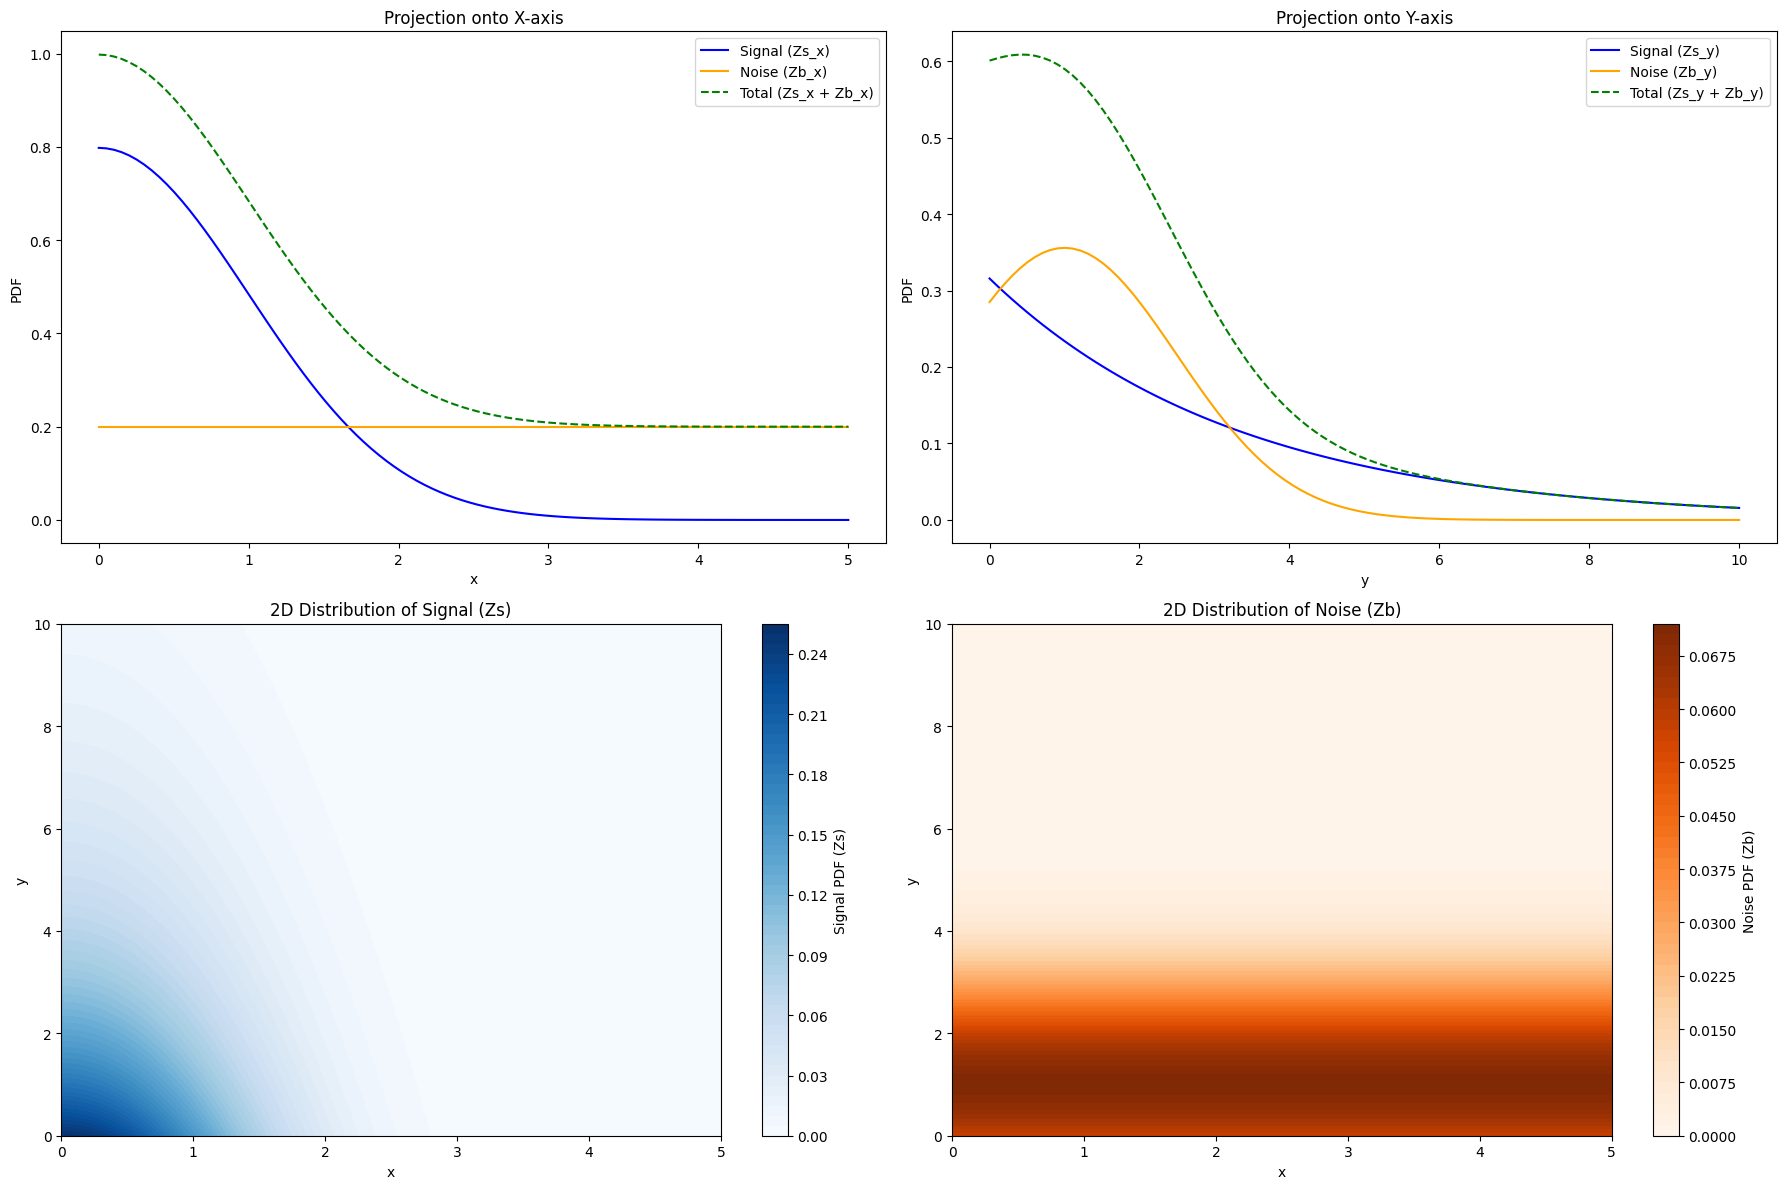

In [5]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

def signal_function(x, y):
    gs = g_s()
    hs = h_s()
    return gs(x) * hs(y)


def noise_function(x, y):
    gb = g_b()
    hb = h_b()
    return gb(x) * hb(y)


# Compute integrations
marginal_signal_x = np.array([quad(lambda y: signal_function(x, y), y_min, y_max)[0] / N for x in x_vals])
marginal_noise_x = np.array([quad(lambda y: noise_function(x, y), y_min, y_max)[0] / N for x in x_vals])

marginal_signal_y = np.array([quad(lambda x: signal_function(x, y), x_min, x_max)[0] / N for y in y_vals])
marginal_noise_y = np.array([quad(lambda x: noise_function(x, y), x_min, x_max)[0] / N for y in y_vals])

# Compute total marginals
total_marginal_x = marginal_signal_x + marginal_noise_x
total_marginal_y = marginal_signal_y + marginal_noise_y

x_vals = np.linspace(x_min, x_max, 100)
y_vals = np.linspace(y_min, y_max, 100)

# Evaluate 2D distributions
X, Y = np.meshgrid(x_vals, y_vals)
Zs = np.vectorize(signal_function)(X, Y) / N
Zb = np.vectorize(noise_function)(X, Y) / N

# Plot projections and 2D distributions
plt.figure(figsize=(18, 12))

# Projection onto x-axis
plt.subplot(2, 2, 1)
plt.plot(x_vals, marginal_signal_x, label="Signal (Zs_x)", color="blue")
plt.plot(x_vals, marginal_noise_x, label="Noise (Zb_x)", color="orange")
plt.plot(x_vals, total_marginal_x, label="Total (Zs_x + Zb_x)", color="green", linestyle="--")
plt.title("Projection onto X-axis")
plt.xlabel("x")
plt.ylabel("PDF")
plt.legend()

# Projection onto y-axis
plt.subplot(2, 2, 2)
plt.plot(y_vals, marginal_signal_y, label="Signal (Zs_y)", color="blue")
plt.plot(y_vals, marginal_noise_y, label="Noise (Zb_y)", color="orange")
plt.plot(y_vals, total_marginal_y, label="Total (Zs_y + Zb_y)", color="green", linestyle="--")
plt.title("Projection onto Y-axis")
plt.xlabel("y")
plt.ylabel("PDF")
plt.legend()

# 2D distribution for signal
plt.subplot(2, 2, 3)
contour_signal = plt.contourf(X, Y, Zs, levels=50, cmap="Blues")
plt.colorbar(contour_signal, label="Signal PDF (Zs)")
plt.title("2D Distribution of Signal (Zs)")
plt.xlabel("x")
plt.ylabel("y")

# 2D distribution for noise
plt.subplot(2, 2, 4)
contour_noise = plt.contourf(X, Y, Zb, levels=50, cmap="Oranges")
plt.colorbar(contour_noise, label="Noise PDF (Zb)")
plt.title("2D Distribution of Noise (Zb)")
plt.xlabel("x")
plt.ylabel("y")

plt.tight_layout()
plt.show()

-------------------------------------
1.34 ms ± 408 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
-------------------------------------
293 ms ± 58.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


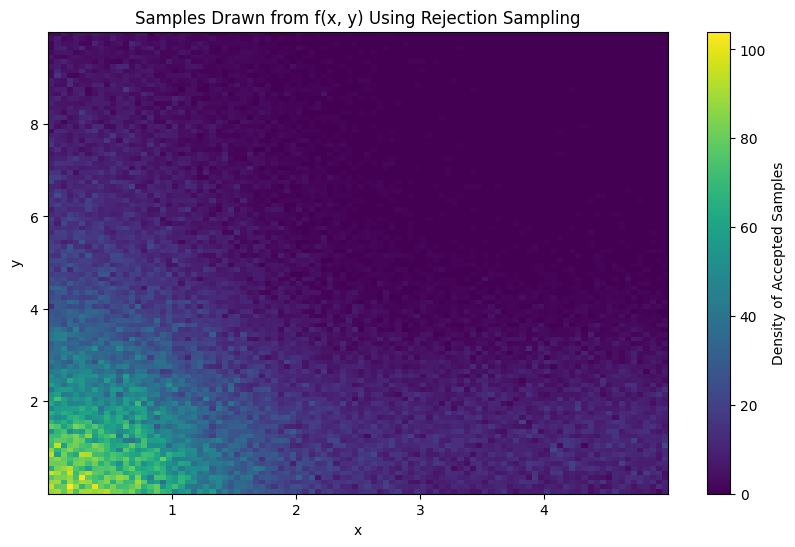

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

print("-------------------------------------")
%timeit np.random.uniform(0, 1, size=int(1e5))
print("-------------------------------------")

# Updated Rejection Sampling Function
def generate_samples(num_samples):
    x_min, x_max = 0, 5
    y_min, y_max = 0, 10

    # Maximum of the normalized function (pre-computed or approximated)
    z_max = 0.17

    np.random.seed(42)
    accepted_X, accepted_Y = [], []

    while len(accepted_X) < num_samples:
        # Generate a batch of random numbers
        batch_size = int(num_samples * 1.5)  # Generate a larger batch to minimize iterations
        X = np.random.uniform(x_min, x_max, size=batch_size)
        Y = np.random.uniform(y_min, y_max, size=batch_size)
        Z = np.random.uniform(0, z_max, size=batch_size)

        # Evaluate the normalized function
        f_values = overall_function(X, Y)  # `overall_function` now uses normalized components

        # Accept samples where Z < f(x, y)
        mask = Z < f_values
        accepted_X.extend(X[mask])
        accepted_Y.extend(Y[mask])

    # Trim to the desired number of samples
    return np.array(accepted_X[:num_samples]), np.array(accepted_Y[:num_samples])

# Generate samples
num_samples = int(1e5)
%timeit x_data, y_data = generate_samples(num_samples)
x_data, y_data = generate_samples(num_samples)

# Plot the accepted samples
plt.figure(figsize=(10, 6))
plt.hist2d(x_data, y_data, bins=100, cmap='viridis')
plt.colorbar(label='Density of Accepted Samples')
plt.title('Samples Drawn from f(x, y) Using Rejection Sampling')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
